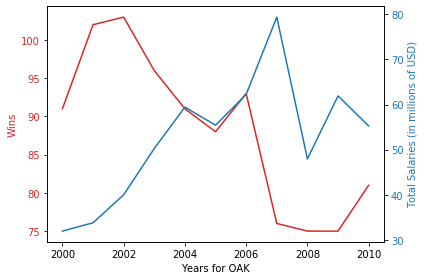

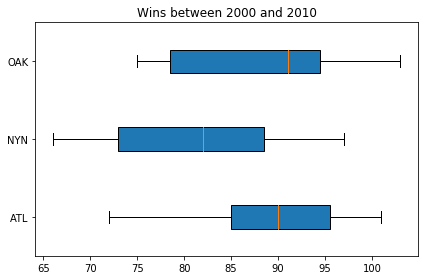

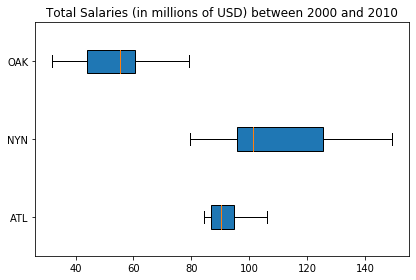

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from get_csv_files           import get_zipped_csv_files
from wins_and_salaries_graph import graph_dual_y, graph_xy_line, graph_boxplots
import pandas

# Problem 1(a)
csv_files = ['Salaries.csv', 'Teams.csv']

get_zipped_csv_files(csv_files=csv_files)

salary_data = pandas.read_csv('Salaries.csv') 
teams_data = pandas.read_csv('Teams.csv')

salary_data.head()
teams_data.head()

# Problem 1(b)
salary_totals = salary_data.groupby(['yearID', 'teamID'])['salary'].sum()
salary_totals.head()

# Problem 1(c)
wins_and_salaries = pandas.merge(salary_totals, teams_data[['yearID', 'teamID', 'W']], on=['yearID', 'teamID'], how='inner')
wins_and_salaries.head()

#  Problem 1(d).  To display the relationship between total wins and total salaries for a given year,
#  I would use two different axes that share the same x axis.  Since wins and salaries share the year range (x-axis),
#  I can plot the second series (total salaries) against the secondary Y axis on the right side of the graph.

graph_dual_y(wins_and_salaries, 'OAK', 2000, 2010)

#graph_xy_line(wins_and_salaries, 'OAK', 'wins', 2000, 2010)
#graph_xy_line(wins_and_salaries, 'OAK', 'SALARIES', 2000, 2010)

graph_boxplots(wins_and_salaries, ['ATL', 'NYN', 'OAK'], 'wins', 2000, 2010)
graph_boxplots(wins_and_salaries, ['ATL', 'NYN', 'OAK'], 'salaries', 2000, 2010)